# Live Coding
## Week 6 Spatial Data

__Outline__
>T1 - Libraries  
T2 - Read & Plot  
T3 - Write & View GeoJSON  
T4 - Geometry, Series, GeoSeries  
T5 - Projection  
T6 - Create GeoDataFrame  
T7 - 'Layers' (figure environment)  
T8 - Axes limits  
T9 - Indexing and selecting data 

In [1]:
# Libraries
import os # a portable way of using operating system dependent functionality
import numpy as np # mathematical operations
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm # colormaps
import matplotlib.pyplot as plt # MATLAB-like way of plotting

from requests import get
from urllib.parse import urlparse

In [2]:
# Read
gpkg_src = 'https://github.com/jreades/fsds/raw/master/data/src/TM_WORLD_BORDERS-0.3.gpkg'
world = gpd.read_file(gpkg_src, driver='GPKG') # .read_file

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

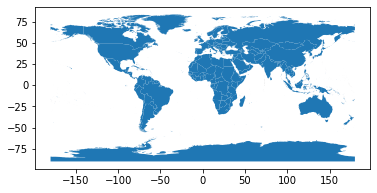

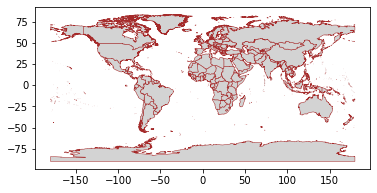

In [3]:
# Plot
world.plot()
world.plot(facecolor='lightgrey', edgecolor='brown', linewidth=0.5)

In [4]:
# Write and view
#world.to_file('world.gpkg', driver='GPKG')
#world.to_file('world.shp', driver='ESRI Shapefile')
world.to_file('world.geojson', driver='GeoJSON')

In [16]:
# Geometry, Series, GeoSeries
world.info

<bound method DataFrame.info of     FIPS ISO2 ISO3   UN                                  NAME    AREA  \
0     AC   AG  ATG   28                   Antigua and Barbuda      44   
1     AG   DZ  DZA   12                               Algeria  238174   
2     AJ   AZ  AZE   31                            Azerbaijan    8260   
3     AL   AL  ALB    8                               Albania    2740   
4     AM   AM  ARM   51                               Armenia    2820   
..   ...  ...  ...  ...                                   ...     ...   
241   TB   BL  BLM  652                      Saint Barthelemy       0   
242   GK   GG  GGY  831                              Guernsey       0   
243   JE   JE  JEY  832                                Jersey       0   
244   SX   GS  SGS  239  South Georgia South Sandwich Islands       0   
245   TW   TW  TWN  158                                Taiwan       0   

      POP2005  REGION  SUBREGION      LON     LAT  \
0       83039      19         29  -61.

In [19]:
world.geometry

0      MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...
1      MULTIPOLYGON (((2.96361 36.80222, 2.98139 36.8...
2      MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...
3      MULTIPOLYGON (((19.43621 41.02107, 19.45055 41...
4      MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...
                             ...                        
241    MULTIPOLYGON (((-63.02834 18.01555, -63.03334 ...
242    MULTIPOLYGON (((-2.59083 49.42249, -2.59722 49...
243    MULTIPOLYGON (((-2.01500 49.21416, -2.02111 49...
244    MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...
245    MULTIPOLYGON (((121.57639 22.00139, 121.57027 ...
Name: geometry, Length: 246, dtype: geometry

In [31]:
print(isinstance(world.geometry, str))
print(isinstance(world.geometry, pd.Series))
print(isinstance(world.geometry, gpd.GeoSeries))

False
True
True


In [20]:
# Projection
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

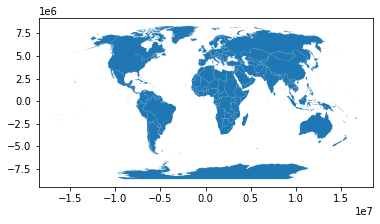

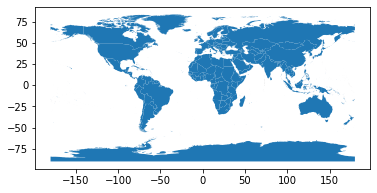

In [21]:
world2 = world.to_crs('ESRI:54030')
world2.plot()
world.plot()

In [28]:
# Create GeoDataFrame
from shapely import wkt
rect = 'POLYGON((5000000.0 2500000.0, 5000000.0 -2500000.0, -5000000.0 -2500000.0, -5000000.0 2500000.0, 5000000.0 2500000.0))'
rectgeo = gpd.GeoDataFrame({'id':[0], 'coordinates':rect})
print(rectgeo)

   id                                        coordinates
0   0  POLYGON((5000000.0 2500000.0, 5000000.0 -25000...


In [32]:
rectgeo['geometry'] = rectgeo.coordinates.apply(wkt.loads) # loads: Load a geometry from a WKT string.
print(rectgeo)
print(isinstance(rectgeo.geometry, gpd.GeoSeries))

   id                                        coordinates  \
0   0  POLYGON((5000000.0 2500000.0, 5000000.0 -25000...   

                                            geometry  
0  POLYGON ((5000000.000 2500000.000, 5000000.000...  
True


<AxesSubplot:>

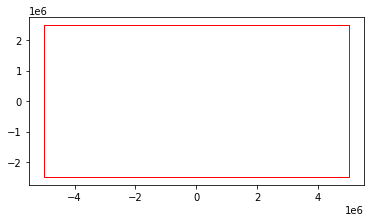

In [29]:
rectgeo = rectgeo.set_crs('ESRI:54030')
rectgeo.plot(edgecolor='red', facecolor='none')

In [35]:
int(float('1e7'))

1000000

<AxesSubplot:>

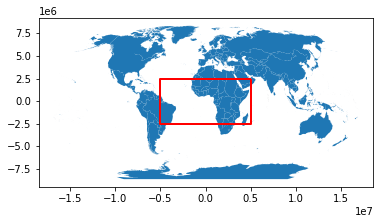

In [45]:
# Layers (figure environment)
# overlay
f,ax=plt.subplots()
world2.plot(ax=ax)
rectgeo.plot(ax=ax, color='none', edgecolor='r', linewidth=2)
# 1 row 2 columns
# f,ax=plt.subplots(1,2,figsize=(8,4))
# world2.plot(ax=ax[0])
# rectgeo.plot(ax=ax[1], color='none', edgecolor='r', linewidth=2)

(-3000000.0, 3000000.0)

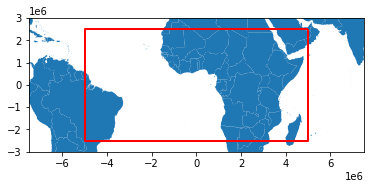

In [46]:
# Axes limits
scale = int(float('1e7'))
f,ax=plt.subplots()
world2.plot(ax=ax)
rectgeo.plot(ax=ax, color='none', edgecolor='r', linewidth=2)
# control axis limits
ax.set_xlim([-0.75*scale, +0.75*scale])
ax.set_ylim([-3*scale/10, +3*scale/10])

In [4]:
# Create spatial data
url1 = 'https://github.com/jreades/fsds/raw/master/data/src/2019-Crime.csv.gz'
#url = 'https://github.com/jreades/i2p/raw/master/data/2019-sample-crime.csv'
df  = pd.read_csv(url1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260025 entries, 0 to 260024
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    260025 non-null  int64  
 1   Case Number           260025 non-null  object 
 2   Date                  260025 non-null  object 
 3   Block                 260025 non-null  object 
 4   IUCR                  260025 non-null  object 
 5   Primary Type          260025 non-null  object 
 6   Description           260025 non-null  object 
 7   Location Description  258928 non-null  object 
 8   Arrest                260025 non-null  bool   
 9   Domestic              260025 non-null  bool   
 10  Beat                  260025 non-null  int64  
 11  District              260025 non-null  int64  
 12  Ward                  260010 non-null  float64
 13  Community Area        260025 non-null  int64  
 14  FBI Code              260025 non-null  object 
 15  

In [6]:
#df.geometry()

In [7]:
gdf = gpd.GeoDataFrame(df, 
            geometry=gpd.points_from_xy(
                        df['Longitude'],
                        df['Latitude'],
                        crs='epsg:4326'))

In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 260025 entries, 0 to 260024
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    260025 non-null  int64   
 1   Case Number           260025 non-null  object  
 2   Date                  260025 non-null  object  
 3   Block                 260025 non-null  object  
 4   IUCR                  260025 non-null  object  
 5   Primary Type          260025 non-null  object  
 6   Description           260025 non-null  object  
 7   Location Description  258928 non-null  object  
 8   Arrest                260025 non-null  bool    
 9   Domestic              260025 non-null  bool    
 10  Beat                  260025 non-null  int64   
 11  District              260025 non-null  int64   
 12  Ward                  260010 non-null  float64 
 13  Community Area        260025 non-null  int64   
 14  FBI Code              260025

In [8]:
# drop na Latitude and Longitude
gdf.drop(gdf[((gdf.Latitude.isna())|(gdf.Longitude.isna()))].index, axis=0, inplace=True)

In [9]:
# drop points off study geographc area
gdf.drop(gdf[((gdf.Latitude < 41)|(gdf.Longitude < -89))].index, axis=0, inplace=True)

<AxesSubplot:>

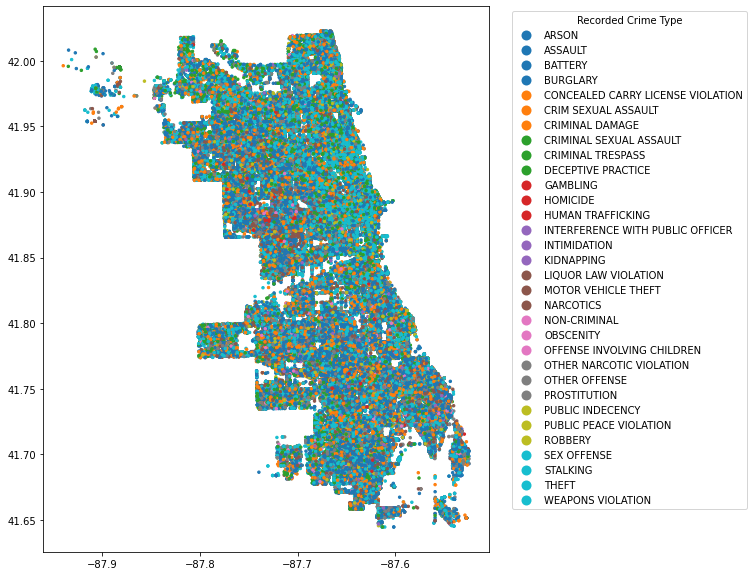

In [27]:
gdf.plot(column='Primary Type', legend=True, legend_kwds={'bbox_to_anchor': (1.04, 1), 'title': 'Recorded Crime Type'}, markersize=6, figsize=(8,16))

<AxesSubplot:>

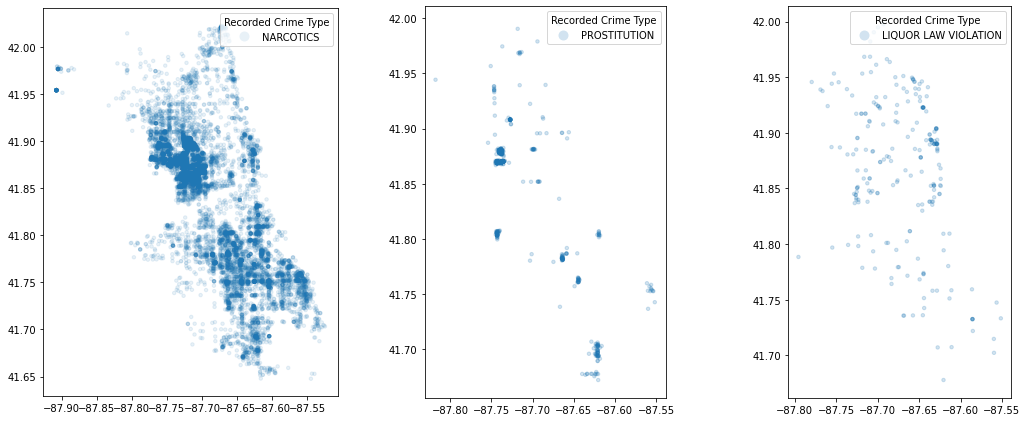

In [43]:
f,ax=plt.subplots(1,3,figsize=(18,7.2))
gdf[gdf['Primary Type'].isin(['NARCOTICS'])].plot(ax=ax[0], column='Primary Type', legend=True, legend_kwds={'loc':'upper right', 'title': 'Recorded Crime Type'}, markersize=12, alpha=0.1)
gdf[gdf['Primary Type'].isin(['PROSTITUTION'])].plot(ax=ax[1],column='Primary Type', legend=True, legend_kwds={'loc':'upper right', 'title': 'Recorded Crime Type'}, markersize=12, alpha=0.2)
gdf[gdf['Primary Type'].isin(['LIQUOR LAW VIOLATION'])].plot(ax=ax[2],column='Primary Type', legend=True, legend_kwds={'loc':'upper right', 'title': 'Recorded Crime Type'}, markersize=12, alpha=0.2)

In [46]:
# Read data set for context
# cities open data portals: https://data.cityofchicago.org/
#bldgs = gpd.read_file( 'https://data.cityofchicago.org/api/geospatial/hz9b-7nh8?method=export&format=GeoJSON' )
tracts = gpd.read_file( 'https://data.cityofchicago.org/api/geospatial/5jrd-6zik?method=export&format=GeoJSON' )

In [5]:
tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

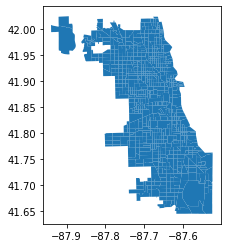

In [7]:
tracts.plot()

In [28]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp10   801 non-null    object  
 1   name10      801 non-null    object  
 2   commarea_n  801 non-null    object  
 3   namelsad10  801 non-null    object  
 4   commarea    801 non-null    object  
 5   geoid10     801 non-null    object  
 6   notes       801 non-null    object  
 7   tractce10   801 non-null    object  
 8   countyfp10  801 non-null    object  
 9   geometry    801 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 62.7+ KB


In [47]:
# Indexing and Selecting Data

# transform to projected CRS
gdf = gdf.to_crs('EPSG:3435')
tracts = tracts.to_crs(gdf.crs)

<AxesSubplot:>

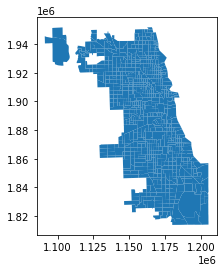

In [34]:
tracts.plot()

In [48]:
scale  = int(float('1e6')) # This is the scale 
xmin = 1.16*scale
xmax = 1.175*scale
ymin = 1.84*scale
ymax = 1.86*scale
crime_slice = gdf.cx[xmin:xmax, ymin:ymax]
tracts_slice = tracts.cx[xmin:xmax, ymin:ymax]

In [60]:
crime_slice['Primary Type'].unique()

array(['OTHER OFFENSE', 'NARCOTICS', 'OFFENSE INVOLVING CHILDREN',
       'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'BATTERY', 'WEAPONS VIOLATION', 'THEFT', 'BURGLARY', 'SEX OFFENSE',
       'MOTOR VEHICLE THEFT', 'ASSAULT', 'HOMICIDE', 'ARSON',
       'CRIMINAL DAMAGE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'CRIM SEXUAL ASSAULT', 'STALKING',
       'OBSCENITY', 'PUBLIC INDECENCY', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTIMIDATION', 'LIQUOR LAW VIOLATION', 'PROSTITUTION',
       'HUMAN TRAFFICKING', 'GAMBLING', 'NON-CRIMINAL'], dtype=object)

<AxesSubplot:>

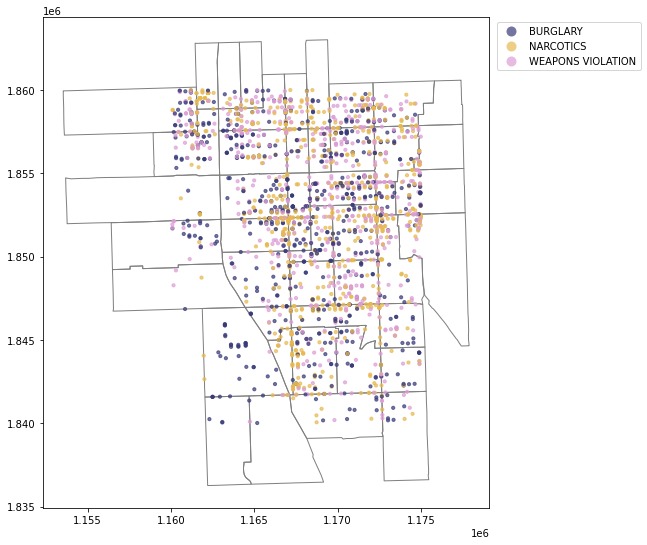

In [54]:
crime_ls = ['NARCOTICS','BURGLARY','WEAPONS VIOLATION']
f,ax=plt.subplots(figsize=(8,16))
tracts_slice.plot(ax=ax, edgecolor='grey', facecolor='none', linewidth=1)          
crime_slice[crime_slice['Primary Type'].isin(crime_ls)].plot(ax=ax, column='Primary Type', cmap='tab20b', markersize=10, alpha=0.7, legend=True, legend_kwds={'bbox_to_anchor': (1.35, 1)})

In [51]:
tracts_a = tracts_slice
tracts_a['area'] = tracts_a['geometry'].area

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

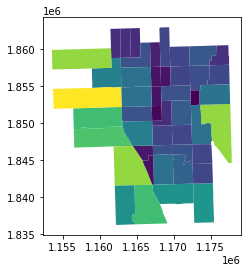

In [52]:
tracts_a.plot(column='area')

(1840013.00005309, 1859999.9998287)

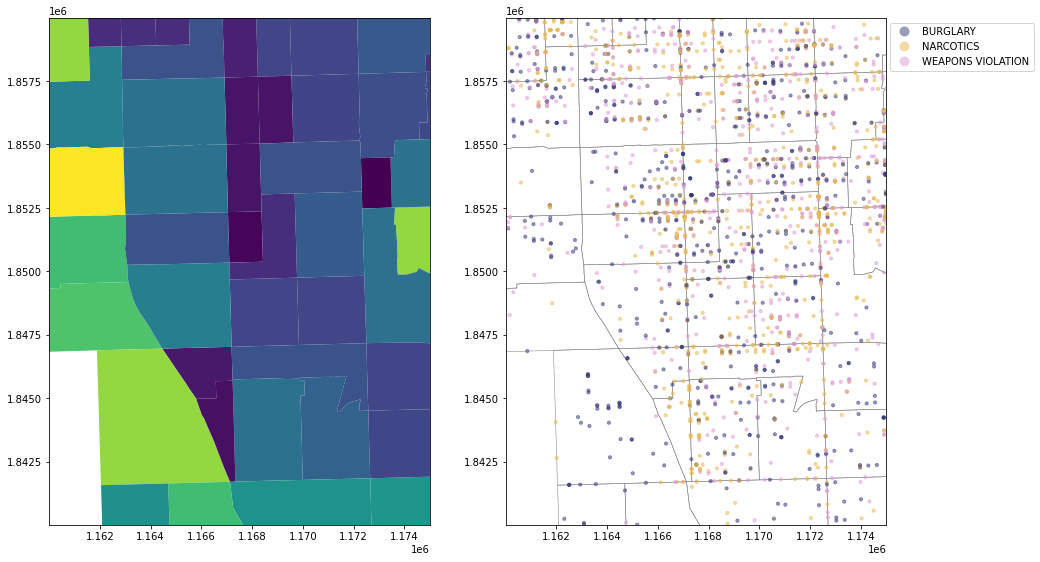

In [60]:
f,ax=plt.subplots(1,2,figsize=(15,15))
tracts_a.plot(ax=ax[0],column='area')
tracts_slice.plot(ax=ax[1], edgecolor='grey', facecolor='none', linewidth=0.5)
crime_slice[crime_slice['Primary Type'].isin(crime_ls)].plot(ax=ax[1], column='Primary Type', cmap='tab20b', markersize=10, alpha=0.5, legend=True, legend_kwds={'bbox_to_anchor': (1.4, 1)})
# control axis limits
ax[0].set_xlim([1160006.99987484, 1174998.00012238])
ax[0].set_ylim([1840013.00005309,1859999.9998287])
ax[1].set_xlim([1160006.99987484, 1174998.00012238])
ax[1].set_ylim([1840013.00005309,1859999.9998287])

In [49]:
crime_slice.total_bounds

array([1160006.99987484, 1840013.00005309, 1174998.00012238,
       1859999.9998287 ])